# Before we start here is something about me- 
* Linkedin : https://www.linkedin.com/in/nikhilmudhalwadkar/
* Github : https://github.com/nmud19
* Gitlab : https://gitlab.com/nmud19
* Email : nmud19@gmail.com
* Contact: 9673844527

# Notebook structure
* The notebook is structured in 4 bolcks each corresponding to the question that was asked.
* Below this cell is a button to toggle the code on/off. Please toggle the code off during this notebook's review for convinience.
* This notebook contains **interactive charts**. If the notebook is saved as a html file then these will be lost. Please use this notebook as ipynb. For example this *[jump to code cell 2](#cell2)* 
* Please rerun the entire notebook end to end for  the interactive charts to work. Otherwise you may get this message *[here](#cell2)* 
> A Jupyter widget could not be displayed because the widget state could not be found. This could happen if the kernel storing the widget is no longer available, or if the widget state was not saved in the notebook. You may be able to create the widget by running the appropriate cells.

* **A request** -  while reviewing this notebook please try to go sequentially through each cell as much as possible. I hope the data's story would be much more enjoyable then. :) 

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# e-Com Analysis
### [Problem Statement]

This dataset containing actual online transactions from 2010 and 2011. This is a transactional dataset which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

-- Perform the Time Series analysis on the sale of different products.

-- Variation of the prices of goods according to the change in date and time.

-- Correlation between unit price and quantity sold.

-- Checking if description has any effect on the price or sale of goods.


### [Deliverables]

-- Zip all your Analysis reports, Visualizations and source code and Upload.

-- Or it would be great if you can share IPython Notebook(.ipynb file) which contains your analysis, visualizations and source code in a single file.


### [Guide]

Stock Analysis Data dump:  http://hck.re/G8khHt

Tech Stack: SAS/SQL, R, Python.

## Solution starts here: 

We will start plotting the trends at an overall level

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive
%matplotlib inline


In [3]:
import pandas as pd

df = pd.read_csv("data.csv", encoding = "latin1")

We will also create some basic time related features like day, month, dayofweek, etc to further visualize.

In [4]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["year"] = df["InvoiceDate"].dt.year
df["month"] = df["InvoiceDate"].dt.month
df["day"] = df["InvoiceDate"].dt.day
df["day_of_week"] = df["InvoiceDate"].dt.dayofweek
df["week"] = df["InvoiceDate"].dt.week
df["month_year"] = df.year.map(str) + "_"+df.month.map(str) 
df["descr"] = df.Description.apply(lambda x: str(x).replace(" ", "_"))
df["product"] = df.StockCode + "---" + df.descr
df["date"] = df.InvoiceDate.dt.date
df["sales"] = df["UnitPrice"] * df["Quantity"]

### Lets just do some basic data checks here

In [5]:
print("Dimensions of the data are : ", df.shape)
print("No of unique products : ", len(df["StockCode"].unique()))

Dimensions of the data are :  (541909, 18)
No of unique products :  4070


In [6]:
print("Missing values are present in these columns : ", df.isna().any())

Missing values are present in these columns :  InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
year           False
month          False
day            False
day_of_week    False
week           False
month_year     False
descr          False
product        False
date           False
sales          False
dtype: bool


Oh , so there are some missing values in Customer Id and Description. We can try to impute missing values in description by first identifying if there is a product code with description available and if yes, we can fill it available.

In [7]:
x = df[["StockCode", "Description"]].drop_duplicates()
df = pd.merge(df, x, how = "left")

#### We will see the trend at date level

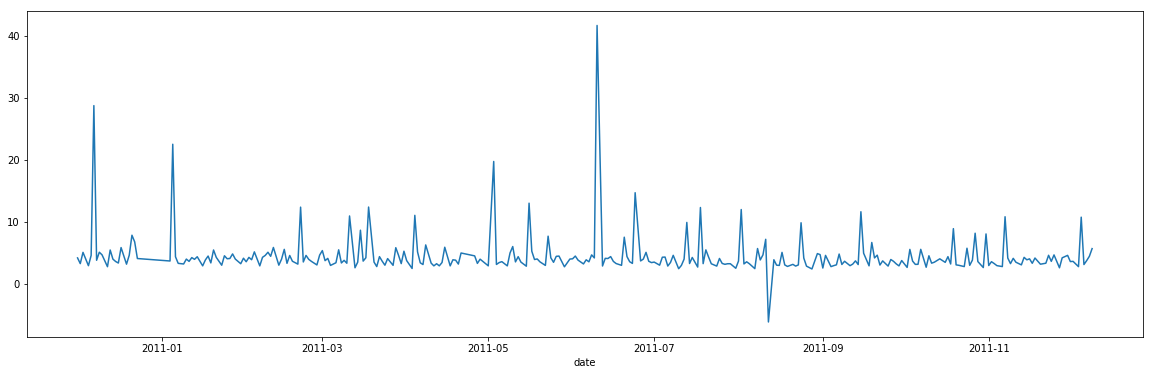

In [8]:
x = df.groupby(["date"])["UnitPrice"].mean()#.fillna(-100)
# x["date"] = x["date"].map(str)
x.plot(figsize=(20,6))

There are some extreme values at both ends. Lets figure out the corresponding dates and we can explore them in the next stage of this notebook. 


We can see a negative value as well, this is intresting. Maybe some values got punched in a bit akwardly during data gathering.
Lets plot the min values across dates and check our hypothesis

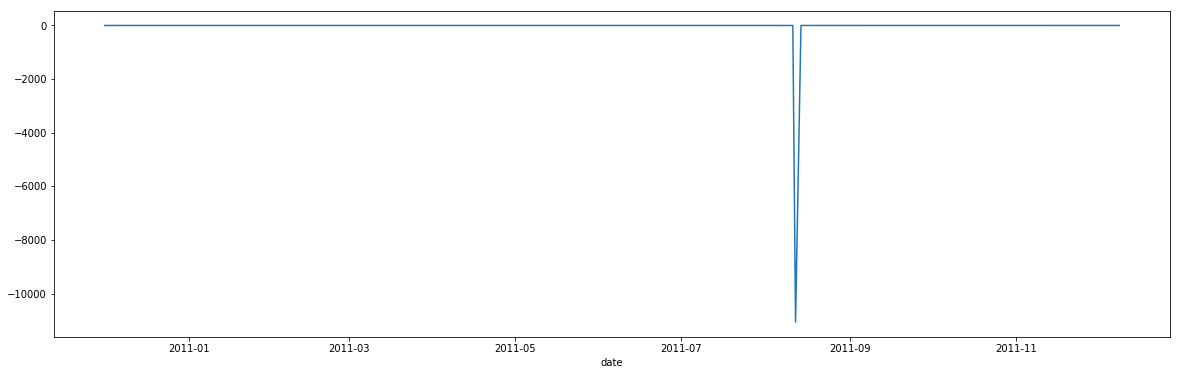

In [9]:
x = df.groupby(["date"])["UnitPrice"].min()#.fillna(-100)
# x["date"] = x["date"].map(str)
x.plot(figsize=(20,6))

Yes, there seems to be a large negative value that drives the data downward. Lets get the exact date for this now-

In [10]:
df[df.UnitPrice < 0][["InvoiceDate", "StockCode", "Description"]]

,InvoiceDate,StockCode,Description
299983,2011-08-12 14:51:00,B,Adjust bad debt
299984,2011-08-12 14:52:00,B,Adjust bad debt


Ok. So the above are the problematic dates that we have. 


### Interactive Charts

Next we will try to inspect date range trends if any pertaining to product. We have here an interactive chart here. The dropdown is a stockCode + description field. Please feel free to try out differnt product charts.

We have also created a new variable called "sales". We can define sales as :unit price * quantity. 

<a id="cell2"></a>

In [11]:
def scatter_plot_draw(product, quantity):    
    global mean_quant_per_product_df1
    df = mean_quant_per_product_df1
    df2 = df[df["product"] ==product]
    plt.figure(figsize=(15,6))
    plt.title(product + " VS date")
    plt.ylabel(quantity + " per day")
    plt.xlabel("DATE")
    plt.plot(df2["date"], df2[quantity])
    plt.show()

mean_quant_per_product_df1 = df.groupby(["date", "product"])[["sales", "UnitPrice", "Quantity"]].mean().reset_index()

interactive_plot = interactive(scatter_plot_draw, product=list(df["product"].unique()) , quantity = ["sales", "UnitPrice", "Quantity"])
# interactive_plot.layout.width = "1000px"
interactive_plot

interactive(children=(Dropdown(description='product', options=('85123A---WHITE_HANGING_HEART_T-LIGHT_HOLDER', '71053---WHITE_METAL_LANTERN', '84406B---CREAM_CUPID_HEARTS_COAT_HANGER', '84029G---KNITTED_UNION_FLAG_HOT_WATER_BOTTLE', '84029E---RED_WOOLLY_HOTTIE_WHITE_HEART.', '22752---SET_7_BABUSHKA_NESTING_BOXES', '21730---GLASS_STAR_FROSTED_T-LIGHT_HOLDER', '22633---HAND_WARMER_UNION_JACK', '22632---HAND_WARMER_RED_POLKA_DOT', '84879---ASSORTED_COLOUR_BIRD_ORNAMENT', "22745---POPPY'S_PLAYHOUSE_BEDROOM_", "22748---POPPY'S_PLAYHOUSE_KITCHEN", '22749---FELTCRAFT_PRINCESS_CHARLOTTE_DOLL', '22310---IVORY_KNITTED_MUG_COSY_', '84969---BOX_OF_6_ASSORTED_COLOUR_TEASPOONS', '22623---BOX_OF_VINTAGE_JIGSAW_BLOCKS_', '22622---BOX_OF_VINTAGE_ALPHABET_BLOCKS', '21754---HOME_BUILDING_BLOCK_WORD', '21755---LOVE_BUILDING_BLOCK_WORD', '21777---RECIPE_BOX_WITH_METAL_HEART', '48187---DOORMAT_NEW_ENGLAND', '22960---JAM_MAKING_SET_WITH_JARS', '22913---RED_COAT_RACK_PARIS_FASHION', '22912---YELLOW_COAT_RACK_PARIS_FASHION', '22914---BLUE_COAT_RACK_PARIS_FASHION', '21756---BATH_BUILDING_BLOCK_WORD', '22728---ALARM_CLOCK_BAKELIKE_PINK', '22727---ALARM_CLOCK_BAKELIKE_RED_', '22726---ALARM_CLOCK_BAKELIKE_GREEN', '21724---PANDA_AND_BUNNIES_STICKER_SHEET', '21883---STARS_GIFT_TAPE_', '10002---INFLATABLE_POLITICAL_GLOBE_', '21791---VINTAGE_HEADS_AND_TAILS_CARD_GAME_', '21035---SET/2_RED_RETROSPOT_TEA_TOWELS_', '22326---ROUND_SNACK_BOXES_SET_OF4_WOODLAND_', '22629---SPACEBOY_LUNCH_BOX_', '22659---LUNCH_BOX_I_LOVE_LONDON', '22631---CIRCUS_PARADE_LUNCH_BOX_', '22661---CHARLOTTE_BAG_DOLLY_GIRL_DESIGN', '21731---RED_TOADSTOOL_LED_NIGHT_LIGHT', '22900---_SET_2_TEA_TOWELS_I_LOVE_LONDON_', '21913---VINTAGE_SEASIDE_JIGSAW_PUZZLES', '22540---MINI_JIGSAW_CIRCUS_PARADE_', '22544---MINI_JIGSAW_SPACEBOY', '22492---MINI_PAINT_SET_VINTAGE_', 'POST---POSTAGE', "22086---PAPER_CHAIN_KIT_50'S_CHRISTMAS_", '20679---EDWARDIAN_PARASOL_RED', '37370---RETRO_COFFEE_MUGS_ASSORTED', '21871---SAVE_THE_PLANET_MUG', '21071---VINTAGE_BILLBOARD_DRINK_ME_MUG', '21068---VINTAGE_BILLBOARD_LOVE/HATE_MUG', '82483---WOOD_2_DRAWER_CABINET_WHITE_FINISH', '82486---WOOD_S/3_CABINET_ANT_WHITE_FINISH', '82482---WOODEN_PICTURE_FRAME_WHITE_FINISH', '82494L---WOODEN_FRAME_ANTIQUE_WHITE_', '21258---VICTORIAN_SEWING_BOX_LARGE', '22114---HOT_WATER_BOTTLE_TEA_AND_SYMPATHY', '21733---RED_HANGING_HEART_T-LIGHT_HOLDER', '22386---JUMBO_BAG_PINK_POLKADOT', '85099C---JUMBO__BAG_BAROQUE_BLACK_WHITE', '21033---JUMBO_BAG_CHARLIE_AND_LOLA_TOYS', '20723---STRAWBERRY_CHARLOTTE_BAG', '84997B---RED_3_PIECE_RETROSPOT_CUTLERY_SET', '84997C---BLUE_3_PIECE_POLKADOT_CUTLERY_SET', '21094---SET/6_RED_SPOTTY_PAPER_PLATES', '20725---LUNCH_BAG_RED_RETROSPOT', '21559---STRAWBERRY_LUNCH_BOX_WITH_CUTLERY', '22352---LUNCH_BOX_WITH_CUTLERY_RETROSPOT_', '21212---PACK_OF_72_RETROSPOT_CAKE_CASES', '21975---PACK_OF_60_DINOSAUR_CAKE_CASES', '21977---PACK_OF_60_PINK_PAISLEY_CAKE_CASES', '84991---60_TEATIME_FAIRY_CAKE_CASES', '84519A---TOMATO_CHARLIE+LOLA_COASTER_SET', '85183B---CHARLIE_&_LOLA_WASTEPAPER_BIN_FLORA', '85071B---RED_CHARLIE+LOLA_PERSONAL_DOORSIGN', '21931---JUMBO_STORAGE_BAG_SUKI', '21929---JUMBO_BAG_PINK_VINTAGE_PAISLEY', '22961---JAM_MAKING_SET_PRINTED', '22139---RETROSPOT_TEA_SET_CERAMIC_11_PC_', '84854---GIRLY_PINK_TOOL_SET', '22411---JUMBO_SHOPPER_VINTAGE_RED_PAISLEY', '82567---AIRLINE_LOUNGE,METAL_SIGN', '21672---WHITE_SPOT_RED_CERAMIC_DRAWER_KNOB', '22774---RED_DRAWER_KNOB_ACRYLIC_EDWARDIAN', '22771---CLEAR_DRAWER_KNOB_ACRYLIC_EDWARDIAN', '71270---PHOTO_CLIP_LINE', '22262---FELT_EGG_COSY_CHICKEN', '22637---PIGGY_BANK_RETROSPOT_', '21934---SKULL_SHOULDER_BAG', "21169---YOU'RE_CONFUSING_ME_METAL_SIGN_", '21166---COOK_WITH_WINE_METAL_SIGN_', '21175---GIN_+_TONIC_DIET_METAL_SIGN', '37444A---YELLOW_BREAKFAST_CUP_AND_SAUCER', '37444C---PINK_BREAKFAST_CUP_AND_SAUCER_', '22083---PAPER_CHAIN_KIT_RETROSPOT', '84971S---SMALL_HEART_FLOWERS_HOOK_', '47580---TEA_TIME_DES_TEA_COSY', '22261---FELT_EGG_COSY_WHITE_RABBIT_', '84832---ZINC_WIL

As you may have noticed too, the data at product-date level seems too sparse.  It seems more or less the unit price remained consistent.

At the sales leve; as well - the data seems too sparse. I again went through a sample charts and I was unable to find any intresting product straight off the bat. Seems we need to follow the mathematical path to get intresting product charts.

### Lets complete this section now. We need to plot trends for weekday, month-year

Now we will plot trends for day of week

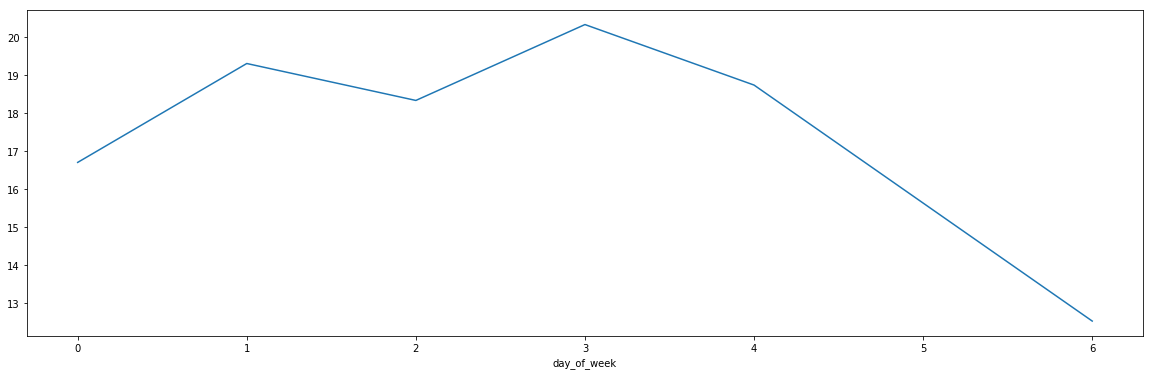

In [12]:
x = df.groupby(["day_of_week"])["sales"].mean()#.fillna(-100)
# x["date"] = x["date"].map(str)
x.plot(figsize=(20,6))

Oh wow. Seems Sunday is a bad day for business!!

It just could that on weekly offs the stores are not functional. Thats why the sudden dip in sales. But is it the same across all countries?

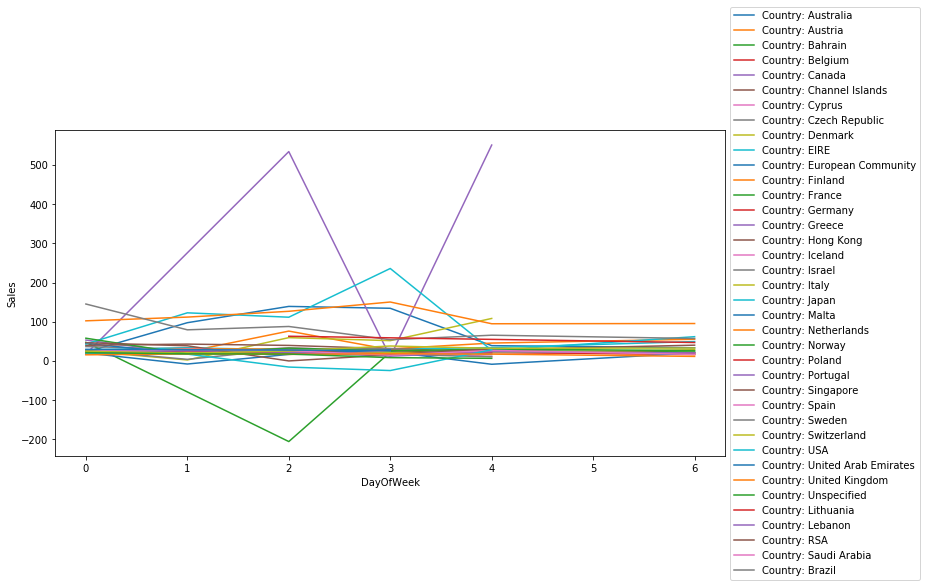

In [13]:
x1 = df.groupby(["day_of_week", "Country"])["sales"].mean().reset_index()

fig, ax = plt.subplots(figsize=(15,6))

for temp in list(x1.Country.unique()):
    dat = x1[x1['Country']==temp]
    dates_f =  dat['day_of_week']
    ax.plot(dates_f, dat['sales'], label = "Country: {0}".format(temp))

plt.xlabel("DayOfWeek")
plt.ylabel("Sales")
# ax.legend()
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure(figsize=(20,20))
plt.show()

Oh, so indeed that is the case. It appears some countries do not do business on weekends. Lets get them

The day of week are encoded as : 

* Monday=0 to Sunday=6

The max business working days of any country is nomore than 6. It means that each country has atleast1 day off.

In [14]:
for c in list(x1.Country.unique()):
    working_days = x1[x1['Country']==c]["day_of_week"].unique()
    if len(working_days) < 7:
        print("{} has {} working business days in the form of {}".format(c, len(working_days), working_days ) )
    else:
        print("{} works on all 7 days".format(c))

Australia has 6 working business days in the form of [0 1 2 3 4 6]
Austria has 6 working business days in the form of [0 1 2 3 4 6]
Bahrain has 3 working business days in the form of [0 2 3]
Belgium has 6 working business days in the form of [0 1 2 3 4 6]
Canada has 4 working business days in the form of [0 2 3 4]
Channel Islands has 6 working business days in the form of [0 1 2 3 4 6]
Cyprus has 5 working business days in the form of [0 1 2 3 4]
Czech Republic has 2 working business days in the form of [0 4]
Denmark has 5 working business days in the form of [0 1 2 3 4]
EIRE has 6 working business days in the form of [0 1 2 3 4 6]
European Community has 5 working business days in the form of [0 1 3 4 6]
Finland has 6 working business days in the form of [0 1 2 3 4 6]
France has 6 working business days in the form of [0 1 2 3 4 6]
Germany has 6 working business days in the form of [0 1 2 3 4 6]
Greece has 3 working business days in the form of [0 1 4]
Hong Kong has 4 working business d

In [15]:
x2 = x1.groupby("day_of_week")["Country"].apply(list).reset_index()
x2["No of countries working "] = x2.Country.apply(lambda x : len(x))
x2

,day_of_week,Country,No of countries working
0,0,"[Australia, Austria, Bahrain, Belgium, Canada,...",33
1,1,"[Australia, Austria, Belgium, Channel Islands,...",29
2,2,"[Australia, Austria, Bahrain, Belgium, Canada,...",30
3,3,"[Australia, Austria, Bahrain, Belgium, Canada,...",32
4,4,"[Australia, Austria, Belgium, Brazil, Canada, ...",30
5,6,"[Australia, Austria, Belgium, Channel Islands,...",19


#### One intresting insight is that no country works on a Saturday(5). Essentially there are no orders placed on  a Saturday in any of the available countries.

For completion's sake lets also plot the avg sales by week for each product

In [16]:
def scatter_plot_draw(product, quantity):    
    global mean_quant_per_product_df
    df = mean_quant_per_product_df
    df2 = df[df["product"] ==product]
    plt.figure(figsize=(15,6))
    plt.title(product + " VS day_of_week")
    plt.ylabel(quantity + " per day")
    plt.xlabel("day_of_week")
    plt.scatter(df2["day_of_week"], df2[quantity])
    plt.show()

mean_quant_per_product_df = df.groupby(["day_of_week", "product"])[["sales", "UnitPrice", "Quantity"]].mean().reset_index()
interactive_plot = interactive(scatter_plot_draw, product=list(df["product"].unique()) , quantity = ["sales", "UnitPrice", "Quantity"])
# interactive_plot.layout.width = "1000px"
interactive_plot

interactive(children=(Dropdown(description='product', options=('85123A---WHITE_HANGING_HEART_T-LIGHT_HOLDER', '71053---WHITE_METAL_LANTERN', '84406B---CREAM_CUPID_HEARTS_COAT_HANGER', '84029G---KNITTED_UNION_FLAG_HOT_WATER_BOTTLE', '84029E---RED_WOOLLY_HOTTIE_WHITE_HEART.', '22752---SET_7_BABUSHKA_NESTING_BOXES', '21730---GLASS_STAR_FROSTED_T-LIGHT_HOLDER', '22633---HAND_WARMER_UNION_JACK', '22632---HAND_WARMER_RED_POLKA_DOT', '84879---ASSORTED_COLOUR_BIRD_ORNAMENT', "22745---POPPY'S_PLAYHOUSE_BEDROOM_", "22748---POPPY'S_PLAYHOUSE_KITCHEN", '22749---FELTCRAFT_PRINCESS_CHARLOTTE_DOLL', '22310---IVORY_KNITTED_MUG_COSY_', '84969---BOX_OF_6_ASSORTED_COLOUR_TEASPOONS', '22623---BOX_OF_VINTAGE_JIGSAW_BLOCKS_', '22622---BOX_OF_VINTAGE_ALPHABET_BLOCKS', '21754---HOME_BUILDING_BLOCK_WORD', '21755---LOVE_BUILDING_BLOCK_WORD', '21777---RECIPE_BOX_WITH_METAL_HEART', '48187---DOORMAT_NEW_ENGLAND', '22960---JAM_MAKING_SET_WITH_JARS', '22913---RED_COAT_RACK_PARIS_FASHION', '22912---YELLOW_COAT_RACK_PARIS_FASHION', '22914---BLUE_COAT_RACK_PARIS_FASHION', '21756---BATH_BUILDING_BLOCK_WORD', '22728---ALARM_CLOCK_BAKELIKE_PINK', '22727---ALARM_CLOCK_BAKELIKE_RED_', '22726---ALARM_CLOCK_BAKELIKE_GREEN', '21724---PANDA_AND_BUNNIES_STICKER_SHEET', '21883---STARS_GIFT_TAPE_', '10002---INFLATABLE_POLITICAL_GLOBE_', '21791---VINTAGE_HEADS_AND_TAILS_CARD_GAME_', '21035---SET/2_RED_RETROSPOT_TEA_TOWELS_', '22326---ROUND_SNACK_BOXES_SET_OF4_WOODLAND_', '22629---SPACEBOY_LUNCH_BOX_', '22659---LUNCH_BOX_I_LOVE_LONDON', '22631---CIRCUS_PARADE_LUNCH_BOX_', '22661---CHARLOTTE_BAG_DOLLY_GIRL_DESIGN', '21731---RED_TOADSTOOL_LED_NIGHT_LIGHT', '22900---_SET_2_TEA_TOWELS_I_LOVE_LONDON_', '21913---VINTAGE_SEASIDE_JIGSAW_PUZZLES', '22540---MINI_JIGSAW_CIRCUS_PARADE_', '22544---MINI_JIGSAW_SPACEBOY', '22492---MINI_PAINT_SET_VINTAGE_', 'POST---POSTAGE', "22086---PAPER_CHAIN_KIT_50'S_CHRISTMAS_", '20679---EDWARDIAN_PARASOL_RED', '37370---RETRO_COFFEE_MUGS_ASSORTED', '21871---SAVE_THE_PLANET_MUG', '21071---VINTAGE_BILLBOARD_DRINK_ME_MUG', '21068---VINTAGE_BILLBOARD_LOVE/HATE_MUG', '82483---WOOD_2_DRAWER_CABINET_WHITE_FINISH', '82486---WOOD_S/3_CABINET_ANT_WHITE_FINISH', '82482---WOODEN_PICTURE_FRAME_WHITE_FINISH', '82494L---WOODEN_FRAME_ANTIQUE_WHITE_', '21258---VICTORIAN_SEWING_BOX_LARGE', '22114---HOT_WATER_BOTTLE_TEA_AND_SYMPATHY', '21733---RED_HANGING_HEART_T-LIGHT_HOLDER', '22386---JUMBO_BAG_PINK_POLKADOT', '85099C---JUMBO__BAG_BAROQUE_BLACK_WHITE', '21033---JUMBO_BAG_CHARLIE_AND_LOLA_TOYS', '20723---STRAWBERRY_CHARLOTTE_BAG', '84997B---RED_3_PIECE_RETROSPOT_CUTLERY_SET', '84997C---BLUE_3_PIECE_POLKADOT_CUTLERY_SET', '21094---SET/6_RED_SPOTTY_PAPER_PLATES', '20725---LUNCH_BAG_RED_RETROSPOT', '21559---STRAWBERRY_LUNCH_BOX_WITH_CUTLERY', '22352---LUNCH_BOX_WITH_CUTLERY_RETROSPOT_', '21212---PACK_OF_72_RETROSPOT_CAKE_CASES', '21975---PACK_OF_60_DINOSAUR_CAKE_CASES', '21977---PACK_OF_60_PINK_PAISLEY_CAKE_CASES', '84991---60_TEATIME_FAIRY_CAKE_CASES', '84519A---TOMATO_CHARLIE+LOLA_COASTER_SET', '85183B---CHARLIE_&_LOLA_WASTEPAPER_BIN_FLORA', '85071B---RED_CHARLIE+LOLA_PERSONAL_DOORSIGN', '21931---JUMBO_STORAGE_BAG_SUKI', '21929---JUMBO_BAG_PINK_VINTAGE_PAISLEY', '22961---JAM_MAKING_SET_PRINTED', '22139---RETROSPOT_TEA_SET_CERAMIC_11_PC_', '84854---GIRLY_PINK_TOOL_SET', '22411---JUMBO_SHOPPER_VINTAGE_RED_PAISLEY', '82567---AIRLINE_LOUNGE,METAL_SIGN', '21672---WHITE_SPOT_RED_CERAMIC_DRAWER_KNOB', '22774---RED_DRAWER_KNOB_ACRYLIC_EDWARDIAN', '22771---CLEAR_DRAWER_KNOB_ACRYLIC_EDWARDIAN', '71270---PHOTO_CLIP_LINE', '22262---FELT_EGG_COSY_CHICKEN', '22637---PIGGY_BANK_RETROSPOT_', '21934---SKULL_SHOULDER_BAG', "21169---YOU'RE_CONFUSING_ME_METAL_SIGN_", '21166---COOK_WITH_WINE_METAL_SIGN_', '21175---GIN_+_TONIC_DIET_METAL_SIGN', '37444A---YELLOW_BREAKFAST_CUP_AND_SAUCER', '37444C---PINK_BREAKFAST_CUP_AND_SAUCER_', '22083---PAPER_CHAIN_KIT_RETROSPOT', '84971S---SMALL_HEART_FLOWERS_HOOK_', '47580---TEA_TIME_DES_TEA_COSY', '22261---FELT_EGG_COSY_WHITE_RABBIT_', '84832---ZINC_WIL

We can also do a month-year wise trend check.

In [17]:
def scatter_plot_draw(product, quantity):    
    global mean_quant_per_product_df3
    df = mean_quant_per_product_df3
    df2 = df[df["product"] ==product]
    plt.figure(figsize=(15,6))
    plt.title(product + " VS month_year")
    plt.ylabel(quantity + " per day")
    plt.xlabel("month_year")
    plt.scatter(df2["month_year"], df2[quantity])
    plt.show()

mean_quant_per_product_df3 = df.groupby(["month_year", "product"])[["sales", "UnitPrice", "Quantity"]].mean().reset_index()
interactive_plot = interactive(scatter_plot_draw, product=list(df["product"].unique()) , quantity = ["sales", "UnitPrice", "Quantity"])
# interactive_plot.layout.width = "1000px"
interactive_plot

interactive(children=(Dropdown(description='product', options=('85123A---WHITE_HANGING_HEART_T-LIGHT_HOLDER', '71053---WHITE_METAL_LANTERN', '84406B---CREAM_CUPID_HEARTS_COAT_HANGER', '84029G---KNITTED_UNION_FLAG_HOT_WATER_BOTTLE', '84029E---RED_WOOLLY_HOTTIE_WHITE_HEART.', '22752---SET_7_BABUSHKA_NESTING_BOXES', '21730---GLASS_STAR_FROSTED_T-LIGHT_HOLDER', '22633---HAND_WARMER_UNION_JACK', '22632---HAND_WARMER_RED_POLKA_DOT', '84879---ASSORTED_COLOUR_BIRD_ORNAMENT', "22745---POPPY'S_PLAYHOUSE_BEDROOM_", "22748---POPPY'S_PLAYHOUSE_KITCHEN", '22749---FELTCRAFT_PRINCESS_CHARLOTTE_DOLL', '22310---IVORY_KNITTED_MUG_COSY_', '84969---BOX_OF_6_ASSORTED_COLOUR_TEASPOONS', '22623---BOX_OF_VINTAGE_JIGSAW_BLOCKS_', '22622---BOX_OF_VINTAGE_ALPHABET_BLOCKS', '21754---HOME_BUILDING_BLOCK_WORD', '21755---LOVE_BUILDING_BLOCK_WORD', '21777---RECIPE_BOX_WITH_METAL_HEART', '48187---DOORMAT_NEW_ENGLAND', '22960---JAM_MAKING_SET_WITH_JARS', '22913---RED_COAT_RACK_PARIS_FASHION', '22912---YELLOW_COAT_RACK_PARIS_FASHION', '22914---BLUE_COAT_RACK_PARIS_FASHION', '21756---BATH_BUILDING_BLOCK_WORD', '22728---ALARM_CLOCK_BAKELIKE_PINK', '22727---ALARM_CLOCK_BAKELIKE_RED_', '22726---ALARM_CLOCK_BAKELIKE_GREEN', '21724---PANDA_AND_BUNNIES_STICKER_SHEET', '21883---STARS_GIFT_TAPE_', '10002---INFLATABLE_POLITICAL_GLOBE_', '21791---VINTAGE_HEADS_AND_TAILS_CARD_GAME_', '21035---SET/2_RED_RETROSPOT_TEA_TOWELS_', '22326---ROUND_SNACK_BOXES_SET_OF4_WOODLAND_', '22629---SPACEBOY_LUNCH_BOX_', '22659---LUNCH_BOX_I_LOVE_LONDON', '22631---CIRCUS_PARADE_LUNCH_BOX_', '22661---CHARLOTTE_BAG_DOLLY_GIRL_DESIGN', '21731---RED_TOADSTOOL_LED_NIGHT_LIGHT', '22900---_SET_2_TEA_TOWELS_I_LOVE_LONDON_', '21913---VINTAGE_SEASIDE_JIGSAW_PUZZLES', '22540---MINI_JIGSAW_CIRCUS_PARADE_', '22544---MINI_JIGSAW_SPACEBOY', '22492---MINI_PAINT_SET_VINTAGE_', 'POST---POSTAGE', "22086---PAPER_CHAIN_KIT_50'S_CHRISTMAS_", '20679---EDWARDIAN_PARASOL_RED', '37370---RETRO_COFFEE_MUGS_ASSORTED', '21871---SAVE_THE_PLANET_MUG', '21071---VINTAGE_BILLBOARD_DRINK_ME_MUG', '21068---VINTAGE_BILLBOARD_LOVE/HATE_MUG', '82483---WOOD_2_DRAWER_CABINET_WHITE_FINISH', '82486---WOOD_S/3_CABINET_ANT_WHITE_FINISH', '82482---WOODEN_PICTURE_FRAME_WHITE_FINISH', '82494L---WOODEN_FRAME_ANTIQUE_WHITE_', '21258---VICTORIAN_SEWING_BOX_LARGE', '22114---HOT_WATER_BOTTLE_TEA_AND_SYMPATHY', '21733---RED_HANGING_HEART_T-LIGHT_HOLDER', '22386---JUMBO_BAG_PINK_POLKADOT', '85099C---JUMBO__BAG_BAROQUE_BLACK_WHITE', '21033---JUMBO_BAG_CHARLIE_AND_LOLA_TOYS', '20723---STRAWBERRY_CHARLOTTE_BAG', '84997B---RED_3_PIECE_RETROSPOT_CUTLERY_SET', '84997C---BLUE_3_PIECE_POLKADOT_CUTLERY_SET', '21094---SET/6_RED_SPOTTY_PAPER_PLATES', '20725---LUNCH_BAG_RED_RETROSPOT', '21559---STRAWBERRY_LUNCH_BOX_WITH_CUTLERY', '22352---LUNCH_BOX_WITH_CUTLERY_RETROSPOT_', '21212---PACK_OF_72_RETROSPOT_CAKE_CASES', '21975---PACK_OF_60_DINOSAUR_CAKE_CASES', '21977---PACK_OF_60_PINK_PAISLEY_CAKE_CASES', '84991---60_TEATIME_FAIRY_CAKE_CASES', '84519A---TOMATO_CHARLIE+LOLA_COASTER_SET', '85183B---CHARLIE_&_LOLA_WASTEPAPER_BIN_FLORA', '85071B---RED_CHARLIE+LOLA_PERSONAL_DOORSIGN', '21931---JUMBO_STORAGE_BAG_SUKI', '21929---JUMBO_BAG_PINK_VINTAGE_PAISLEY', '22961---JAM_MAKING_SET_PRINTED', '22139---RETROSPOT_TEA_SET_CERAMIC_11_PC_', '84854---GIRLY_PINK_TOOL_SET', '22411---JUMBO_SHOPPER_VINTAGE_RED_PAISLEY', '82567---AIRLINE_LOUNGE,METAL_SIGN', '21672---WHITE_SPOT_RED_CERAMIC_DRAWER_KNOB', '22774---RED_DRAWER_KNOB_ACRYLIC_EDWARDIAN', '22771---CLEAR_DRAWER_KNOB_ACRYLIC_EDWARDIAN', '71270---PHOTO_CLIP_LINE', '22262---FELT_EGG_COSY_CHICKEN', '22637---PIGGY_BANK_RETROSPOT_', '21934---SKULL_SHOULDER_BAG', "21169---YOU'RE_CONFUSING_ME_METAL_SIGN_", '21166---COOK_WITH_WINE_METAL_SIGN_', '21175---GIN_+_TONIC_DIET_METAL_SIGN', '37444A---YELLOW_BREAKFAST_CUP_AND_SAUCER', '37444C---PINK_BREAKFAST_CUP_AND_SAUCER_', '22083---PAPER_CHAIN_KIT_RETROSPOT', '84971S---SMALL_HEART_FLOWERS_HOOK_', '47580---TEA_TIME_DES_TEA_COSY', '22261---FELT_EGG_COSY_WHITE_RABBIT_', '84832---ZINC_WIL

Since we do nothave a full cycle availabe ,we canignore yearand monthwise trends exploration. 

### Autocorelation

Autocorelation : 


* We can use statistical measures to calculate the correlation between the output variable and values at previous time steps at various different lags. The stronger the correlation between the output variable and a specific lagged variable, the more weight that autoregression model can put on that variable when modeling.

* Again, because the correlation is calculated between the variable and itself at previous time steps, it is called an autocorrelation. It is also called serial correlation because of the sequenced structure of time series data.

* The correlation statistics can also help to choose which lag variables will be useful in a model and which will not.

* Interestingly, if all lag variables show low or no correlation with the output variable, then it suggests that the time series problem may not be predictable. This can be very useful when getting started on a new dataset.

#### Lets plot a autocorelation plot for the entire dataset. It is highly unlikely that we will build 4k individual predictive models for each product(for example - what if we build a simple xgboost model, its is highly inefficient to build 4k models) so lets look at them combined. We can take the average sales for that date after a bit of cleaning. 

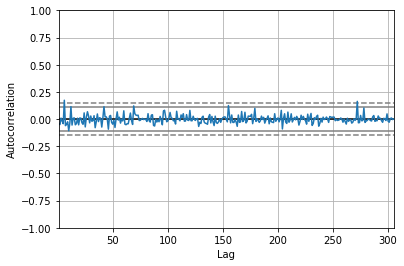

In [18]:
from pandas.plotting import autocorrelation_plot
arel = df[df["sales"]>0].groupby(["date"])["sales"].mean()
autocorrelation_plot(arel)

The above can very quickly give an idea of which lag variables may be good candidates for use in a predictive model and how the relationship between the observation and its historic values changes over time. For example here we can see that the lag of approx 275needs to be taken while building any predictive modelsince it has a high corelation.

## Correlation between unit price and quantity sold.

This is the next task we can take up. We will find out the cor coeffs in this partof exploration. The method to interpret this is :

* A correlation coefficient of 1 means that for every positive increase in one variable, there is a positive increase of a fixed proportion in the other. For example, shoe sizes go up in (almost) perfect correlation with foot length.
* A correlation coefficient of -1 means that for every positive increase in one variable, there is a negative decrease of a fixed proportion in the other. For example, the amount of gas in a tank decreases in (almost) perfect correlation with speed.
* Zero means that for every increase, there isn’t a positive or negative increase. The two just aren’t related.

Firstly we can find the absolute corelation coefficient between unit price and quantity sold. we will take raw data and then simply find the corr coeff between boththe columns.

In [19]:
df[["UnitPrice", "Quantity"]].corr()

,UnitPrice,Quantity
UnitPrice,1.000000,-0.001235
Quantity,-0.001235,1.000000


The coeff is almost 0. It indicates that there is norelation between the two. 

Secondly,lets create corr coeffs product wise. Then maybe we can get the products which have a high VS products which have a low corr coeff.

In [20]:
from scipy.stats.stats import pearsonr   
g1 = df.groupby(["product"])["UnitPrice"].apply(list).reset_index()
g2 = df.groupby(["product"])["Quantity"].apply(list).reset_index()
g = pd.merge(g1,g2)
g["count"] = g.Quantity.apply(lambda x : len(x))
g["corr"] = g[["UnitPrice", "Quantity"]].apply(lambda x : pearsonr(x["UnitPrice"], x["Quantity"])[0], axis=1 )

D:\py_anaconda\lib\site-packages\scipy\stats\stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
D:\py_anaconda\lib\site-packages\scipy\stats\stats.py:5240: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0
D:\py_anaconda\lib\site-packages\scipy\stats\stats.py:3013: RuntimeWarning: invalid value encountered in double_scalars
  prob = _betai(0.5*df, 0.5, df/(df+t_squared))


To keepvalid corelation coefficientslets set upa threashold of say 20 values? What this means is thatwe willtake into account only products which have a significant amount of entries. Else,there can be say a couple of entries which are say 

unitprice= [1,2] and quantity=[3,4]. 

This shows a positive corelation whichmay notmake sense in realworld problems.

In [21]:
g = g[g["count"]>20]

#### These are the top5 products which have negative correlation coefficients.

In [22]:
g[["product", "corr", "count"]].sort_values(by = ["corr"]).head()

,product,corr,count
2297,22709---WRAP_WEDDING_DAY,-0.989415,39
3020,23231---WRAP_DOILEY_DESIGN,-0.983970,164
963,21503---TOYBOX__WRAP_,-0.981522,24
3513,23691---WRAP_KEEP_CALM_BIRTHDAY,-0.980469,36
3308,23460---SWEETHEART_WALL_TIDY_,-0.974868,47


#### These are the top5 products which have positive correlation coefficients.

In [23]:
g[["product", "corr", "count"]].dropna(subset = ["corr"]).sort_values(by = ["corr"], ascending = 0).head()

,product,corr,count
3909,47591d---PINK_FAIRY_CAKE_CHILDRENS_APRON,0.833780,56
5019,85049a---TRADITIONAL_CHRISTMAS_RIBBONS,0.768993,36
4224,82494l---WOODEN_FRAME_ANTIQUE_WHITE_,0.719548,61
5102,85123a---WHITE_HANGING_HEART_T-LIGHT_HOLDER,0.708138,67
4918,85014b---RED_RETROSPOT_UMBRELLA,0.672593,23


#### Finally we can plot these corr coeffs using a pie chart. We willround it  tothe nearest 0.1 and then we can plot the counts.

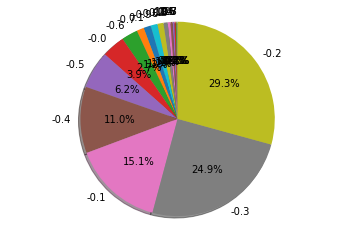

In [24]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
g["roundedcorr"] = g["corr"].apply(lambda x : round(x,1 ))
de = g.groupby("roundedcorr")["product"].count().reset_index()
de = de.sort_values(by =["product"])
labels = list(de.roundedcorr)
sizes = list(de["product"])
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, 
#         explode=explode, 
        labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.figure(figsize=(15,6))
plt.show()

This shows that more than 50% of the products have a coeff corelation from -0.2 to -0.3. It means that theyhave a  slight negative corelation for unitprice VS quantity sold.

# Checking if description has any effect on the price or sale of goods.

Lets start by creating some basic features from description. We should now also clean the data to kind of get an accuracte picture.

In [25]:
cleaned_data = df.copy()
cleaned_data["no_of_letters"] = cleaned_data["Description"].apply(lambda x :len(str(x)) )
cleaned_data["no_of_words"] = cleaned_data["Description"].apply(lambda x :len(str(x).split(" ")) )

We will also reverse engineer this. We will find the most and least sold items and then we can go over their descriptions.


This is the leastsold items with descr

In [26]:
gdata = df.groupby(["StockCode", "Description"])["sales"].mean().reset_index()
gdata = gdata[gdata["sales"] > 10]
gdata.sort_values(by = ["sales"]).head(10)

,StockCode,Description,sales
639,21366,MIRRORED WALL ART PHOTO FRAMES,10.003617
1039,21868,POTTING SHED TEA MUG,10.008987
1872,22705,WRAP GREEN PEARS,10.010886
4188,85088,CANDY SPOT HAND BAG,10.011887
370,21003,ROSE DU SUD CUSHION COVER,10.012609
4477,90051,CRACKED GLAZE NECKLACE RED,10.022857
3952,84877B,GREEN ROUND COMPACT MIRROR,10.026667
4629,90163A,PINK ROSEBUD & PEARL NECKLACE,10.035556
4350,85215,ASSORTED CHEESE FRIDGE MAGNETS,10.039444
4647,90176B,DIAMANTE NECKLACE BLACK,10.040000


Correspondingly this is the most sold itemswrt sales

In [27]:
gdata.sort_values(by = ["sales"],ascending=0).head(10)

,StockCode,Description,sales
1643,22502,PICNIC BASKET WICKER 60 PIECES,19809.750000
3290,47556B,TEA TIME TEA TOWELS,3022.500000
2415,23131,MISELTOE HEART WREATH CREAM,996.000000
324,20914,SET/5 RED SPOTTY LID GLASS BOWLS,734.400000
1409,22275,WEEKEND BAG VINTAGE ROSE PAISLEY,527.850000
2024,22833,HALL CABINET WITH 3 DRAWERS,520.706000
2021,22830,UTILTY CABINET WITH HOOKS,435.048333
1067,21897,POTTING SHED CANDLE CITRONELLA,422.730000
946,21769,VINTAGE POST OFFICE CABINET,303.825000
4780,DOT,DOTCOM POSTAGE,290.896305


We cannot at least find any conclusive evidence from this. Lets do this:

We can find the most frequent top 20 words from the most brought items to the least brought items. We can use 1000 sample descriptions for this purpose.


#### Lets start with finding the most frequent words used in the top 1000 selling  items wrt sales

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
most_sold = gdata.sort_values(by = ["sales"],ascending=1).head(1000)["Description"].fillna(" ")
most_sold = " ".join(list(most_sold))
most_sold = most_sold.split()

cv = CountVectorizer(ngram_range=(1,2), stop_words="english")
bag_of_words = cv.fit_transform(most_sold)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
sorted(words_freq, key = lambda x: x[1], reverse=True)[0:20]

[('heart', 88),
 ('pink', 87),
 ('set', 78),
 ('red', 61),
 ('vintage', 58),
 ('wrap', 55),
 ('white', 53),
 ('blue', 47),
 ('christmas', 44),
 ('bag', 43),
 ('glass', 43),
 ('necklace', 39),
 ('box', 38),
 ('holder', 36),
 ('design', 35),
 ('large', 33),
 ('light', 32),
 ('hanging', 31),
 ('cake', 29),
 ('polkadot', 29)]

The most frequent words used in the bottom 1000 selling items wrt sales

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
most_sold = gdata.sort_values(by = ["sales"],ascending=0).head(1000)["Description"].fillna(" ")
most_sold = " ".join(list(most_sold))
most_sold = most_sold.split()

cv = CountVectorizer(ngram_range=(1,2), stop_words="english")
bag_of_words = cv.fit_transform(most_sold)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
sorted(words_freq, key = lambda x: x[1], reverse=True)[0:20]

[('set', 118),
 ('vintage', 76),
 ('red', 59),
 ('wall', 59),
 ('bag', 55),
 ('pink', 52),
 ('heart', 48),
 ('holder', 44),
 ('light', 42),
 ('box', 42),
 ('retrospot', 41),
 ('art', 40),
 ('glass', 38),
 ('large', 38),
 ('white', 38),
 ('christmas', 35),
 ('cutlery', 34),
 ('design', 33),
 ('blue', 33),
 ('tea', 31)]

Again we there seems to be norelation. We can see that words like christmas, pink, red, vintage are present in both lists. The nextstep we can take is to find most frequent bigrams.

Bigrams : a pair of consecutive written units such as letters, syllables, or words.

These are the most frequent bigrams used from the least sold items by sales.

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
most_sold = gdata.sort_values(by = ["sales"],ascending=0).head(1000)["Description"].fillna(" ")
most_sold = " ".join(list(most_sold))
most_sold = most_sold.split()

cv = CountVectorizer(ngram_range=(2,3), stop_words="english")
bag_of_words = cv.fit_transform(most_sold)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
sorted(words_freq, key = lambda x: x[1], reverse=True)[0:20]

[('set 10', 3),
 ('42 neckl', 2),
 ('100 00', 1),
 ('deco white', 1),
 ('50 00', 1),
 ('40 00', 1),
 ('jean paul', 1),
 ('enamel glass', 1),
 ('white pink', 1),
 ('pink blue', 1),
 ('tea coffee', 1),
 ('coffee sugar', 1),
 ('tea coffee sugar', 1),
 ('30 00', 1),
 ('black blue', 1),
 ('black silver', 1),
 ('orange wht', 1),
 ('wht fuschia', 1),
 ('orange wht fuschia', 1),
 ('neckl 36', 1)]

These are the most frequent bigrams used from the most sold items by sales.

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
most_sold = gdata.sort_values(by = ["sales"],ascending=1).head(1000)["Description"].fillna(" ")
most_sold = " ".join(list(most_sold))
most_sold = most_sold.split()

cv = CountVectorizer(ngram_range=(2,3), stop_words="english")
bag_of_words = cv.fit_transform(most_sold)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
sorted(words_freq, key = lambda x: x[1], reverse=True)[0:20]

[('charlie lola', 3),
 ('glass silver', 3),
 ('white pink', 3),
 ('pink white', 2),
 ('glass bead', 2),
 ('tea coffee', 2),
 ('coffee sugar', 2),
 ('tea coffee sugar', 2),
 ('black white', 2),
 ('neckl36 amethyst', 1),
 ('crystal glass', 1),
 ('silver mop', 1),
 ('set 20', 1),
 ('pink purple', 1),
 ('neckl36 turquois', 1),
 ('choc blue', 1),
 ('stars trees', 1),
 ('green blue', 1),
 ('red white', 1),
 ('pink blue', 1)]

Well,  now we have some intresting insights. It seems the jewllery category occurs in the top half by sales.This is expected since the unitprice of an amethyst is defenately more than thatof tes/sugar/coffee packs.

### Relation wrt no of words and no of letters

Here we will plot a pairplot of no of letters, words, sales and quantity. The way to interpret them is

* Visualise this as a matrix
* The x-axis is  denoted by the axis at the bottom of the column
* The y axis is denoted by the axis at the left of each row

In [32]:
import seaborn as sns
cleaned_data = cleaned_data[cleaned_data["sales"]>=0]
cleaned_data = cleaned_data[cleaned_data["Quantity"]<=5000]
cleaned_data["Description"] = cleaned_data["Description"].fillna("")
cleaned_data["Description"] = cleaned_data["Description"].apply(lambda x : x.lstrip())
cleaned_data["Description"] = cleaned_data["Description"].apply(lambda x : x.rstrip())
cleaned_data["Description"] = cleaned_data["Description"].apply(lambda x : x.upper())

# g = sns.PairGrid(cleaned_data[["sales", "Quantity","UnitPrice" ,"no_of_letters", "no_of_words"]])
# # g.map_upper(plt.scatter)
# # g.map_lower(sns.kdeplot, cmap="Blues_d")
# g.map(plt.scatter)

There dosent seem to be any variation in sales/quantity/unit price wrt no of letters or the no of words used to describe the product.

## Wordclouds

A tag cloud (word cloud, or weighted list in visual design) is a visual representation of text data, typically used to depict keyword metadata (tags) on websites, or to visualize free form text. Tags are usually single words, and the importance of each tag is shown with font size or color.

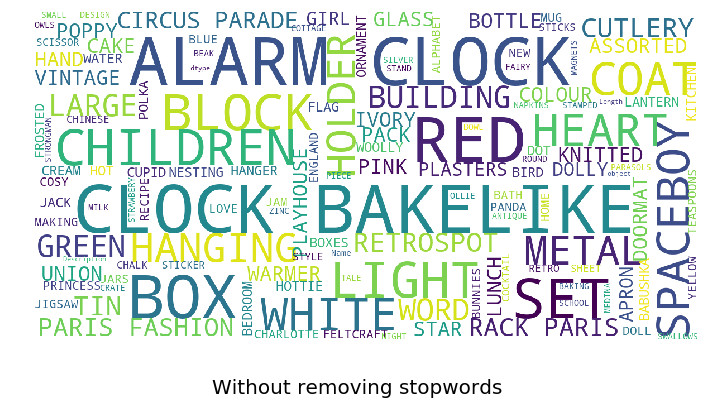

In [33]:
from wordcloud import WordCloud, STOPWORDS
# stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
#         stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(cleaned_data['Description'], title="Without removing stopwords")

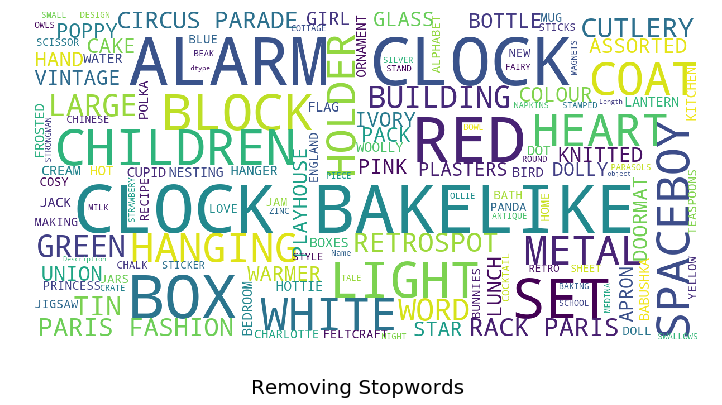

In [34]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = "Removing Stopwords"):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(cleaned_data['Description'])

We can inferthat this is a no nonsense description. Even after removing stopwords we are not seeing any change in the top x most frequentwords.

#### Essentially after all these checks we are able to conclude that jewlery items are more expoensive and have a higher sales than other products. Tea ,coffee and sugar packs are present in both- the lower tier as wellas the higher tier of sales by volumne. No of words/letters used to describe the product do notaffect it in any major way.